<center>Заметка 9. Функции и прикладные дела.</center>
<center>курса <q>Математический практикум по Питону</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.12</center>

<center>Аннотация</center>
<p>
Создание функций (определение и объявление). Показана важность ранее пройденных объектов: словарь (dict) и кортеж (couple).
</p>

<p>Это предварительная версия! Любые замечания приветсвуются.</p>

<h1>Функции</h1>

<h2>Отрисовка графика</h2>

In [1]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as models

Напомню:

In [2]:
import csv # Для рабом с csv файлами.

In [3]:
data = []
with open( 'MTLR_180101_190110.txt' ) as f:
    data_rows = csv.reader( f, delimiter = ';' )
    data = list( data_rows )
close = list( map( lambda x: float(x[-2]), data) ) # Или сразу.
#close Не будем его выводить. Там много данных.

Text(0.5, 0, 'День начиная с 2018 г')

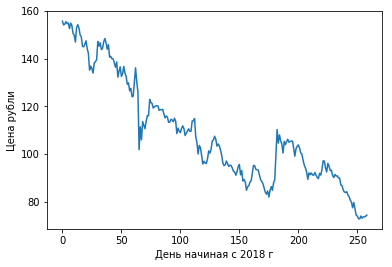

In [4]:
plt.plot( close )
plt.ylabel( 'Цена рубли')
plt.xlabel( 'День начиная с 2018 г')

Как выполнить данное считывания и для других эмитентов, т.е. для других файлов?
Можно создать функцию, которая обособит код.

<h3>Функции</h3>

Мы уже сталкивались с ламбда функциями. Напомню.

In [5]:
# Задаем ламбда функцию, которая удваивает число (объект).
dbl = lambda x : 2*x

In [6]:
# Применим функцию путем её вызова.
dbl( 2 ), dbl( -1.1 ), dbl( 3.5 )

(4, -2.2, 7.0)

In [7]:
# На всякий случай приведем и такой пример.
dbl( 'раз ' ) # Мы все это уже знаем...

'раз раз '

Ламбда функция не позволяет задать больше одного действия. Фактически это обособленное выражение. Дабы можно было отделить несколько последовательных операций необходимо использовать функции.
Покажем их сначала как вариант ламбда функций.

Функция задаяется (объявляется и определяется) ключевым словом def в начале строки.
Далее, через пробел, идет имя, в скобках список её аргументов.
Строка звершается двоеточием.

In [8]:
# В данном случае, функция имеет название dblF и один аргумент x.
def dblF( x ): 
    # Сдесь могут идти действия. Но у нас простая функция. Поэтому их нет.
    # Для возврата значения из функции ипользется оператор return.
    return 2*x # Перед возвратом значения вычисляется выражение.

In [9]:
dblF( 2 ), dblF( -1.3 ), dblF( 'ещё раз ' ) # Вызов полностью совпадает.

(4, -2.6, 'ещё раз ещё раз ')

In [10]:
# Ламбда функция от двух аргументов. Возводит в степень.
mypow = lambda x, y: x**y
# Аналогичная функция mypowW имеет два аргумента.
def mypowW( x, y):
    return x**y

In [11]:
# Вызвали функции от двух аргументов.
mypow( 2, 3), mypowW( 2, 3), mypowW( 25, 0.5)

(8, 8, 5.0)

Конечно можно строить композицию.

In [12]:
# Напомню, что вызовы делаются по значению,
# т.е. сначала вычисляется значение аргумента,
mypow( dbl(1), 4), mypowW( dblF(1), 4), dbl( mypowW(3, 2) )
# а потом это значение передается дальше.

(16, 16, 18)

<b>именные аргументы</b>

In [13]:
# В качестве примера возьмем другую функцию.
def mysum( a, b): # Теперь у функции два аргумента
    return a + b * 2; # Возвращаем значение выражения.

In [14]:
mysum( 3, 2) # 3 + 2 * 2

7

В предыдущем вызове функции mysum число 3 будет присвоено первому аргументу функции, т.е. переменной a, а число 2 второму аргументу, т.е. переменной b. Таким образом, значения присваиваются аргументам исходя из того порядка в котором они идут при вызове функции.
В Питоне значения аргументов можно передавать не только по номеру аргумента в списке (по позиции), но и по его названию.
В Питоне есть возможность этот порядок изменить и выполнить вызов функции явно указав какому аргументу какое значение присовить. Для этого при вызове используется оператор присвоения.

In [15]:
# Для явного указания какому аргументу
# какое значение присовить используется оператор присвоения.
mysum( b = 3, a = 2) # аргументу b присвоено значение 3,
# а a  число 2. 2 + 3 * 2

8

Естественно что существует ряд ограничений.

In [16]:
mysum( c = 5 ) # Имя аргумента должно сущестовать.

TypeError: mysum() got an unexpected keyword argument 'c'

Можно комбинировать режимы. Но при двух аргументов мало что скомбинируешь. Тем не менее...

In [17]:
# При таком вызове система запутается.
mysum( 3, a = 2) # Точнее будет повторное присвоение первому аргументу.

TypeError: mysum() got multiple values for argument 'a'

In [18]:
# А так нельзя потомучто после присвоения переменной значения по имени
mysum( b = 3, 2) # позиции не учитываются.

SyntaxError: positional argument follows keyword argument (<ipython-input-18-d671d05ce8fb>, line 2)

In [19]:
mysum(0, b=-1)

-2

Но можно так.

In [20]:
# Функция от трех аргументов.
def mymac(a, m, s): # mac -- Multiply–accumulate operation.
    return a + m*s

In [21]:
mymac(10, s=3, m=2) # Так можно. 10 + 2*3

16

<b>Значения по умолчанию</b>

In [22]:
# при вызове функции необходио указать значение всех аргументов.
mysum( 5 )

TypeError: mysum() missing 1 required positional argument: 'b'

Упр. Напиши функцию вычисляющую корень квадратного уравнения. Например, а) больший корень. б) оба корня ввиде набора.

In [23]:
# Можно сделать значения по умолчанию
def mysum2( a, b = 5): # У аргумента b задано значение по умолчанию,
    return a + b * 2; # которое используется в случае,
# если оно не задано явно.

In [24]:
mysum2( 3 ) # Так можно. 3 + 5 * 2

13

In [25]:
mysum2( 3, 2) # А можно и указать значение. 3 + 2 * 2

7

In [26]:
# Обычные переменные не могут следовать после переменных
# с заданным значением по умолчанию.
def mysum3( a, b = 5, c):
    return a + b + c

SyntaxError: non-default argument follows default argument (<ipython-input-26-bdb07b823b50>, line 3)

Упр. Напиши функцию вычисляющую логарифм. По умолчанию основание пусть будет натуральным. Иначе, оно должно быть указано.

<b>Тело</b>

In [27]:
# Тело функции ествественно может быть сложным
def doCnt( a, c=0 ): # Вычисляем .
    eq = list(map( lambda x: x==c, a))
    return np.mean( eq )

In [28]:
doCnt( [1, 2, 3, 0, 5, 4, 0, 8], 2 ), 1/8 # 8 элементов.

(0.125, 0.125)

In [29]:
doCnt( [1, 2, 3, 0, 5, 4, 0, 8] )

0.25

Упр. Напиши функцию вычисляющую среднее и среднеквадратичное отклонение массива.

<h3>Обратно к эмитентам</h3>

In [30]:
def txt2data( name ): # Функция принимает на вход название файла.
    with open( name ) as f:
        data_rows = csv.reader( f, delimiter = ';' )
        data = list( data_rows )
    # close = list( map( lambda x: float(x[-2]), data) ) Или сразу
    return data

In [31]:
mechel = txt2data( 'MTLR_180101_190110.txt' )
mtl_cl = np.array( list( map( lambda x: float(x[-2]), mechel) )) # -2 это цена закрытия.

In [32]:
vtb = txt2data( 'VTBR_180101_190110.txt' )
vtb_cl = np.array( list( map( lambda x: float(x[-2]), vtb) ))

Text(0.5, 0, 'День начиная с 2018 г')

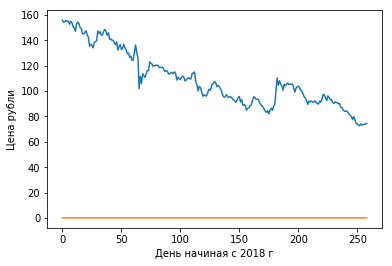

In [33]:
plt.plot( mtl_cl )
plt.plot( vtb_cl )
plt.ylabel( 'Цена рубли')
plt.xlabel( 'День начиная с 2018 г')

Чего-то с графиком цены не то...
они разного масштаба.

Пусть будет график процентного изменения.

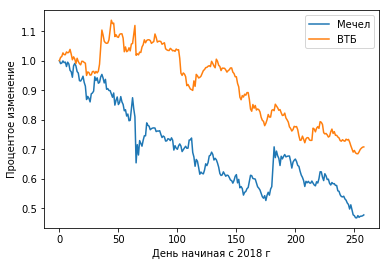

In [34]:
plt.plot( mtl_cl/mtl_cl[0] ) # Поделим все элементы массива на самое первое значение.
plt.plot( vtb_cl/vtb_cl[0] ) # Аналогично для второго эмитента.
plt.ylabel( 'Процентое изменение') # Отображаем не цену, а процентное изменение.
plt.xlabel( 'День начиная с 2018 г')
plt.legend( ["Мечел", "ВТБ"] )

In [35]:
gaz = txt2data( 'GAZP_180101_190110.txt' )
gaz_cl = np.array( list( map( lambda x: float(x[-2]), gaz) ))

Как во всех этих элементах не запутаться?
Напомню, есть такая вещь как словарь.

<b>Каталог эмитентов</b>

In [36]:
ticket = dict()

In [37]:
ticket['MTLR'] = mtl_cl
ticket['VTBR'] = vtb_cl
ticket['GAZP'] = gaz_cl

In [38]:
i = list(ticket.items())

In [39]:
i;

In [40]:
# Первый элемент кортежа имя (ключ),
i[0][0], type( i[0][1] ) # второе сами данные (котировки).

('MTLR', numpy.ndarray)

In [41]:
def doPlt( i, lab ):
    k, t = i
    plt.plot( t/t[0] )
    lab.append( k )

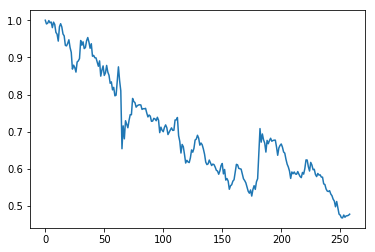

In [42]:
doPlt(i[0], [])

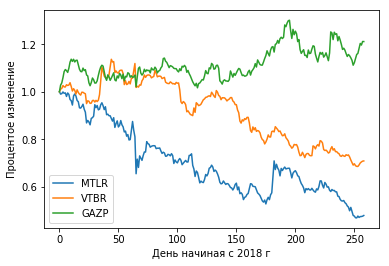

In [43]:
lab = []
list( map( lambda x : doPlt(x, lab), ticket.items() ))
plt.ylabel( 'Процентое изменение')
plt.xlabel( 'День начиная с 2018 г')
plt.legend( lab )

Упражнение. Как сделать так чтобы подписи в легенде были не сокращенные названия, а полноценные имена (как в предыдущем графике).

<h3>Применение</h3>

<b>Обратно к обработке строки</b>

In [44]:
translit = str.maketrans({'п':'p', 'р':'r', 'о':'o', 'е':'e', 'к':'k', 'а':'a', 'в':'v'})
translit # Словарь соотетствия: по одному символу дается другой.

{1087: 'p', 1088: 'r', 1086: 'o', 1077: 'e', 1082: 'k', 1072: 'a', 1074: 'v'}

In [45]:
'проверка'.translate( translit ) # Используем для посимвольного преобразования.

'proverka'

In [46]:
# Иногда (когда буква соответсвует букве) можно обойтись и строчкой.
traslit = str.maketrans( 'проверка', 'proverka') # Строится словарь.
traslit

{1087: 112, 1088: 114, 1086: 111, 1074: 118, 1077: 101, 1082: 107, 1072: 97}

In [47]:
# Когда букв нет в словаре трансляции, они не обрабатываются.
'проверь'.translate( translit )

'proverь'

<b>Да и сам список</b>

In [48]:
stud = ['Алексей',"Дима", "Аня", "Саша"]
stud

['Алексей', 'Дима', 'Аня', 'Саша']

In [49]:
stud.sort()
stud

['Алексей', 'Аня', 'Дима', 'Саша']

Как получить табельный номер студента?

In [50]:
stud_num = enumerate( stud ) # Нумирует список.
stud_num # Как обычно пока это просто генератор.

In [51]:
stud_num = list( stud_num ) # Формируем из него список.
stud_num # Список состоит из кортежей
# (индекс и, соответствующее, значение элемента списка).

[(0, 'Алексей'), (1, 'Аня'), (2, 'Дима'), (3, 'Саша')]

In [52]:
stud_num[2] # Кортеж из номера и значения списка (имени).

(2, 'Дима')

In [53]:
# Теперь можно сделать аналог списка через словарь.
studd = dict(stud_num)
studd

{0: 'Алексей', 1: 'Аня', 2: 'Дима', 3: 'Саша'}

In [54]:
type(studd), studd[2], type(stud), stud[2], 

(dict, 'Дима', list, 'Дима')

In [55]:
stud_name = list( map( lambda x: (x[1], x[0]), stud_num ))
stud_name        

[('Алексей', 0), ('Аня', 1), ('Дима', 2), ('Саша', 3)]

In [56]:
# А теперь словарь, который по имени возвращает номер.
studn = dict(stud_name)
studn

{'Алексей': 0, 'Аня': 1, 'Дима': 2, 'Саша': 3}

In [57]:
studn['Дима']

2

<h2>Сложный индекс -- объект</h2>

На самом деле ранее используемое понятие сложного индекса является объектом питона: slice. 

In [58]:
# Как и ранее, указывается начальный индекс,
a = slice( 1, -1, 1) # последний не включительно и шаг.
a, type(a)

(slice(1, -1, 1), slice)

In [59]:
# Имея объект, который работает с понятием сложного индекса,
# можно вместо индекса подать объект срез.
b = [1, 2, 3, 4, 5]
b[ a ] # Применяем как обычно при использовании сложного индекса.

[2, 3, 4]

In [60]:
# Результат совпадает с применением сложного индекса напрямую.
b[ 1: -1: 1]

[2, 3, 4]

In [61]:
# Раз срез -- объект, то его можно, например,
def subsum( a, s): # передавать как значение функции.
    return sum( a[s] )

In [62]:
# Четный и нечетный поддиапазон индексов.
l = [ slice(0, -1, 2), slice(1, -1, 2) ]

In [63]:
subsum( b, l[0]), subsum( b, l[1])

(4, 6)

In [64]:
# Как и объект touple
a.start = 3 # объект срез является константным.

AttributeError: readonly attribute

In [65]:
# Можно использовать его метод indices для получения сложного индекса без отрцательных первых двух чисел.
c = a.indices(10) # Для 10го объекта. Нумерация с 0.
c # Раз индексов бесконечно много (-1), то получим значение.

(1, 9, 1)

In [66]:
slice(-1, -5, -1).indices(10)

(9, 5, -1)

In [67]:
# Если же взять ограниченный срез,
a = slice(1,5,1) # то поведение будет иное.

In [68]:
a.indices(2) # Указываем сколько фактически элементов.

(1, 2, 1)

In [69]:
a.indices(10) # Мы упремся в "последний" элемент.

(1, 5, 1)

In [70]:
# Так как речь идет о настоящем индексе,
a.indices( -2 ) # то отрицательным он быть не может.

ValueError: length should not be negative

In [71]:
a = slice(1, -1, -1)

In [72]:
a.indices(5)

(1, 4, -1)